Import the libraries

In [372]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import nltk as nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import classification_report, confusion_matrix

In [373]:
%matplotlib inline

## 1. Load the dataset

In [374]:
imdb = pd.read_csv('imdb_movies.csv', index_col = 0)

In [375]:
imdb.head()

,Title,Year,Certification,Runtime,Genre,Summary,Votes,Ratings
0,The Shawshank Redemption,1994,MA,142,Drama,Two imprisoned men bond over a number of years...,2164040,9.3
1,The Godfather,1972,R,175,"Crime, Drama",The aging patriarch of an organized crime dyna...,1485485,9.2
2,The Dark Knight,2008,M,152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,2138907,9.0
3,The Godfather: Part II,1974,M,202,"Crime, Drama",The early life and career of Vito Corleone in ...,1034512,9.0
4,The Lord of the Rings: The Return of the King,2003,M,201,"Adventure, Drama, Fantasy",Gandalf and Aragorn lead the World of Men agai...,1536487,8.9


## 2. Data Cleansing

Drop all the rows that contain null values

In [376]:
imdb.dropna()

,Title,Year,Certification,Runtime,Genre,Summary,Votes,Ratings
0,The Shawshank Redemption,1994,MA,142,Drama,Two imprisoned men bond over a number of years...,2164040,9.3
1,The Godfather,1972,R,175,"Crime, Drama",The aging patriarch of an organized crime dyna...,1485485,9.2
2,The Dark Knight,2008,M,152,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,2138907,9.0
3,The Godfather: Part II,1974,M,202,"Crime, Drama",The early life and career of Vito Corleone in ...,1034512,9.0
4,The Lord of the Rings: The Return of the King,2003,M,201,"Adventure, Drama, Fantasy",Gandalf and Aragorn lead the World of Men agai...,1536487,8.9
5,Pulp Fiction,1994,R,154,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",1698837,8.9
6,Schindler's List,1993,M,195,"Biography, Drama, History","In German-occupied Poland during World War II,...",1122674,8.9
7,12 Angry Men,1957,G,96,Drama,A jury holdout attempts to prevent a miscarria...,619233,8.9
8,Inception,2010,M,148,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,1896880,8.8
9,Fight Club,1999,R,139,Drama,An insomniac office worker and a devil-may-car...,1728920,8.8


Generate a list with all the column names

In [377]:
column_names = list(imdb.columns)
print(column_names)

['Title', 'Year', 'Certification', 'Runtime', 'Genre', 'Summary', 'Votes', 'Ratings']


## 3. Exploratory Data Analysis

First, we look at the effect of each of the independent variables on the target variable

C:\Users\iangi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


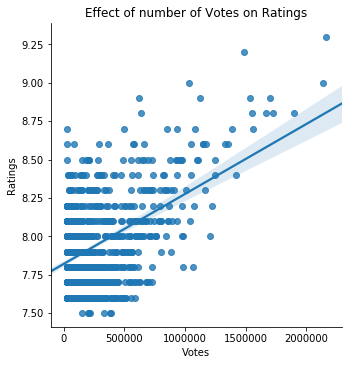

In [378]:
sns.lmplot(x = 'Votes', y = 'Ratings', data = imdb, fit_reg = True)
plt.title('Effect of number of Votes on Ratings')
plt.savefig('Votes_vs_Ratings.png')

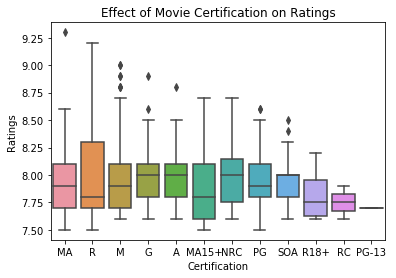

In [379]:
sns.boxplot(x = 'Certification', y = 'Ratings', data = imdb)
plt.title('Effect of Movie Certification on Ratings')
plt.savefig('Certification_vs_Ratings.png')

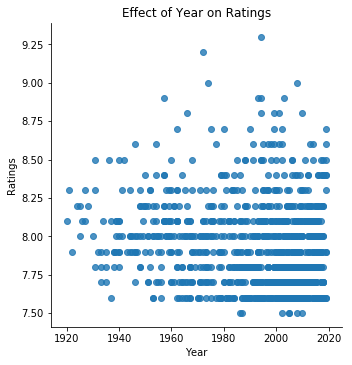

In [380]:
sns.lmplot(x = 'Year', y = 'Ratings', data = imdb, fit_reg = False)
plt.title('Effect of Year on Ratings')
plt.savefig('Ratings_by_Year.png')

C:\Users\iangi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


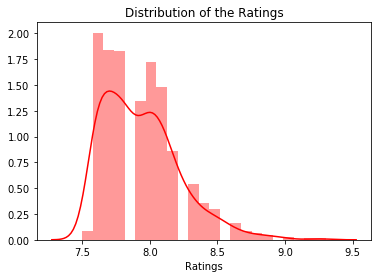

In [381]:
sns.distplot(imdb['Ratings'], color = 'Red')
plt.title('Distribution of the Ratings')
plt.savefig('Ratings_distribution.png')

C:\Users\iangi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


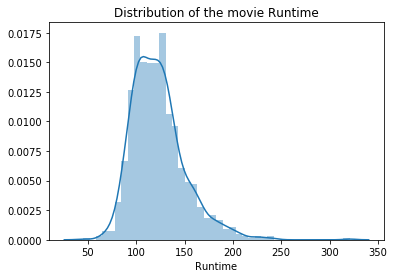

In [382]:
sns.distplot(imdb['Runtime'])
plt.title('Distribution of the movie Runtime')
plt.savefig('Runtime_distribution.png')

## 4. NLP Analysis

### 1. Pre-Processing Text

Create the dataset specific to the NLP analysis

In [383]:
movies = imdb[['Summary', 'Ratings']]
movies.head()

,Summary,Ratings
0,Two imprisoned men bond over a number of years...,9.3
1,The aging patriarch of an organized crime dyna...,9.2
2,When the menace known as the Joker wreaks havo...,9.0
3,The early life and career of Vito Corleone in ...,9.0
4,Gandalf and Aragorn lead the World of Men agai...,8.9


The standard stopword list may need to be extended with new stopwords based on the analysis. These are added below:

In [384]:
stopwords = nltk.corpus.stopwords.words('english')
additional_stopwords = ["'", "'s"]
stopwords.extend(additional_stopwords)

Define functions to clean the text

In [385]:
def token(text):
    tokens = word_tokenize(text)
    return tokens

def remove_punctuation(text):
    new_list = []
    for word in text:
        if word not in string.punctuation:
            new_list.append(word)
    return new_list
            
def no_numbers(text):
    new_list = []
    for word in text:
        if not word.isdigit():
            new_list.append(word)
    return new_list

def remove_stopwords(text):
    new_list = []
    for word in text:
        if word not in stopwords:
            new_list.append(word)
    return new_list

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    lem_text = [lemmatizer.lemmatize(word) for word in text]
    return lem_text

def cleaner(text):
    clean_text = text.lower()
    clean_text = token(clean_text)
    clean_text = remove_punctuation(clean_text)
    clean_text = no_numbers(clean_text)
    clean_text = remove_stopwords(clean_text)
    clean_text = lemmatize_words(clean_text)
    return clean_text

Create a single list with the complete text

In [386]:
complete_text = ''
for row in imdb['Summary']:
    complete_text = complete_text + row

Use the functions to clean the text

In [387]:
clean_text = cleaner(complete_text)

Explore the distribution of the words in the complete text

In [388]:
word_distribution = nltk.FreqDist(clean_text)
word_distribution.most_common(10)

[('young', 126),
 ('life', 125),
 ('man', 114),
 ('find', 104),
 ('woman', 75),
 ('new', 72),
 ('two', 68),
 ('family', 64),
 ('world', 64),
 ('story', 62)]

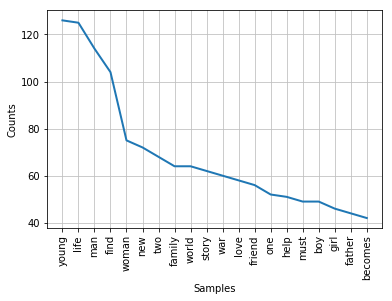

<Figure size 432x288 with 0 Axes>

In [389]:
word_distribution.plot(20, cumulative = False)
plt.show()
plt.savefig('Top_words.png')

Create a vectoriser object and fit it to the complete text vocabulary

In [390]:
vec = CountVectorizer(max_features = 10000, analyzer = 'word', ngram_range = (2,3), tokenizer = None, lowercase = False)
vec.fit_transform(clean_text)

<14411x904 sparse matrix of type '<class 'numpy.int64'>'
	with 1023 stored elements in Compressed Sparse Row format>

In [391]:
clean_summary = []
for element in movies['Summary']:
    clean_element = cleaner(element)
    clean_summary.append(clean_element)
    
movies['Description'] = clean_summary

C:\Users\iangi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [392]:
movies.head()

,Summary,Ratings,Description
0,Two imprisoned men bond over a number of years...,9.3,"[two, imprisoned, men, bond, number, year, fin..."
1,The aging patriarch of an organized crime dyna...,9.2,"[aging, patriarch, organized, crime, dynasty, ..."
2,When the menace known as the Joker wreaks havo...,9.0,"[menace, known, joker, wreaks, havoc, chaos, p..."
3,The early life and career of Vito Corleone in ...,9.0,"[early, life, career, vito, corleone, 1920s, n..."
4,Gandalf and Aragorn lead the World of Men agai...,8.9,"[gandalf, aragorn, lead, world, men, sauron, a..."


In [393]:
ratings_class = []
for element in movies['Ratings']:
    if element >= 7 and element < 8:
        result = 'Good'
        ratings_class.append(result)
    if element >= 8  and element < 9:
        result = 'Great'
        ratings_class.append(result)
    if element >= 9:
        result = 'Excellent'
        ratings_class.append(result)    

In [394]:
movies['Ratings_Class'] = ratings_class
movies.head()

C:\Users\iangi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Summary,Ratings,Description,Ratings_Class
0,Two imprisoned men bond over a number of years...,9.3,"[two, imprisoned, men, bond, number, year, fin...",Excellent
1,The aging patriarch of an organized crime dyna...,9.2,"[aging, patriarch, organized, crime, dynasty, ...",Excellent
2,When the menace known as the Joker wreaks havo...,9.0,"[menace, known, joker, wreaks, havoc, chaos, p...",Excellent
3,The early life and career of Vito Corleone in ...,9.0,"[early, life, career, vito, corleone, 1920s, n...",Excellent
4,Gandalf and Aragorn lead the World of Men agai...,8.9,"[gandalf, aragorn, lead, world, men, sauron, a...",Great


### 2. Feature Engineering

Split the dataset into training and validation datasets 

In [395]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(movies['Description'], movies['Ratings_Class'], 
                                                                      test_size = 0.35)

Transform the text 

In [396]:
train_x_vec = vec.transform(train_x.astype('str'))
valid_x_vec = vec.transform(valid_x.astype('str'))

### 3. Model Building

In [397]:
svclassifier = svm.SVC(kernel='rbf')
svclassifier.fit(train_x_vec, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 4. Model Evaluation

Use the model to predict the validation set

In [398]:
predicted_class = svclassifier.predict(valid_x_vec)

Assess the performance of the model

In [399]:
print(confusion_matrix(valid_y, predicted_class))
print(classification_report(valid_y, predicted_class))

[[  0   3   0]
 [  0 196   0]
 [  0 151   0]]
             precision    recall  f1-score   support

  Excellent       0.00      0.00      0.00         3
       Good       0.56      1.00      0.72       196
      Great       0.00      0.00      0.00       151

avg / total       0.31      0.56      0.40       350



C:\Users\iangi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
